# List

In [2]:
import IPython; IPython.display.HTML('''<script>code_show=true; function code_toggle() { if (code_show){ $('div.nbinput').show(); } else { $('div.nbinput').hide(); } code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

    def __repr__(self):
        cur = self
        vals = []
        while cur:
            vals.append(cur.val)
            cur = cur.next
        return str(vals)

class List:
    def __init__(self, vals):
        if not vals:
            raise ValueError('Must initialize List with a non-empty array. ')
        cur = self.head = ListNode(vals[0])
        for val in vals[1:]:
            cur.next = ListNode(val)
            cur = cur.next

    def __repr__(self):
        return str(self.head)

print(List([1, 2, 3]).head)
print(List([1, 2, 3]))

[1, 2, 3]
[1, 2, 3]


## [2. Add Two Numbers](https://leetcode.com/problems/add-two-numbers/description/)

Medium

You are given two non-empty linked lists representing two non-negative integers. The digits are stored in reverse order, and each of their nodes contains a single digit. Add the two numbers and return the sum as a linked list.

You may assume the two numbers do not contain any leading zero, except the number 0 itself.

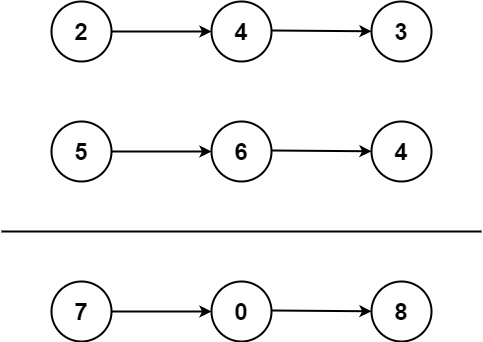

Example 1:

    Input: l1 = [2,4,3], l2 = [5,6,4]
    Output: [7,0,8]
    Explanation: 342 + 465 = 807.

Constraints:

    The number of nodes in each linked list is in the range [1, 100].
    0 <= Node.val <= 9
    It is guaranteed that the list represents a number that does not have leading zeros.

In [6]:
def addTwoNumbers(l1, l2):
    dummy = cur = ListNode()
    carry = 0

    while l1 or l2 or carry:
        cur.next = ListNode()
        cur = cur.next

        carry += (l1.val if l1 else 0) + (l2.val if l2 else 0)
        carry, cur.val = divmod(carry, 10)

        l1 = l1.next if l1 else None
        l2 = l2.next if l2 else None

    return dummy.next

l1 = List([2, 4, 3]).head
l2 = List([5, 6, 4]).head
addTwoNumbers(l1, l2)

[7, 0, 8]

## [24. Swap Nodes in Pairs](https://leetcode.com/problems/swap-nodes-in-pairs/)

Medium

Given a linked list, swap every two adjacent nodes and return its head. You must solve the problem without modifying the values in the list's nodes (i.e., only nodes themselves may be changed.)

Example 1:

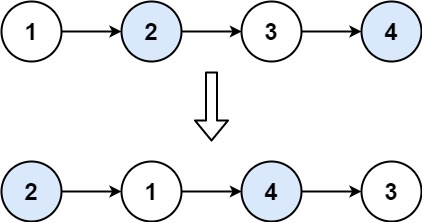!

    Input: head = [1,2,3,4]
    Output: [2,1,4,3]
    Example 2:

Constraints:

    The number of nodes in the list is in the range [0, 100].
    0 <= Node.val <= 100

In [7]:
# 前兩個交換，剩下遞迴

def swapPairs(head):
    if head is None or head.next is None:
        return head
    else:
        res = head.next
        head.next = swapPairs(head.next.next)
        res.next = head
    return res

lst = List([1, 2, 3, 4]).head
swapPairs(lst)

[2, 1, 4, 3]

## [206. Reverse Linked List](https://leetcode.com/problems/reverse-linked-list/)

Easy

Given the head of a singly linked list, reverse the list, and return the reversed list.

Example 1:

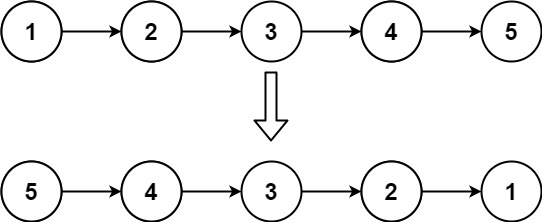

    Input: head = [1,2,3,4,5]
    Output: [5,4,3,2,1]

Constraints:

    The number of nodes in the list is the range [0, 5000].
    -5000 <= Node.val <= 5000


In [8]:
# Hannah's solution：不改指標而是倒著長一個新的 list
# 實測比改指標用到更多 memory

def reverseList(head):
    res = None
    while head:
        res = ListNode(val=head.val, next=res)
        head = head.next
    return res

lst = List([1, 2, 3, 4, 5])
reverseList(lst.head)

[5, 4, 3, 2, 1]

In [2]:
# 改指標；迴圈裡用 tmp 寫比較直觀 readable
# 雖然也可以用 tuple unpacking 寫成 cur.next, prev, cur = prev, cur, cur.next

def reverseList(head):
    prev = None
    cur = head
    while cur:
        tmp = cur.next
        cur.next = prev
        prev = cur
        cur = tmp
        
    return prev

lst = List([1, 2, 3, 4, 5])
reverseList(lst.head)

[5, 4, 3, 2, 1]

In [11]:
# recursive solution from the repo
# 遞迴呼叫完成時的狀態是 1 -> 2 <- 3 <- 4 <- 5，head 是 1

def reverseList(head):
    if head is None or head.next is None:
        return head

    reverse = reverseList(head.next)
    head.next.next = head
    head.next = None
    
    return reverse

lst = List([1, 2, 3, 4, 5])
reverseList(lst.head)

[5, 4, 3, 2, 1]

## [141. Linked List Cycle](https://leetcode.com/problems/linked-list-cycle/description/)

Easy

Given head, the head of a linked list, determine if the linked list has a cycle in it.

There is a cycle in a linked list if there is some node in the list that can be reached again by continuously following the next pointer. Internally, pos is used to denote the index of the node that tail's next pointer is connected to. Note that pos is not passed as a parameter.

Return true if there is a cycle in the linked list. Otherwise, return false.

Example 1:

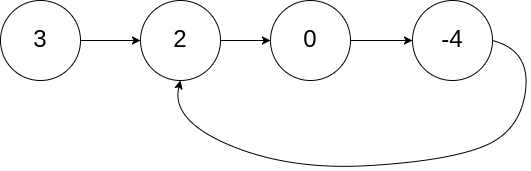

    Input: head = [3,2,0,-4], pos = 1
    Output: true
    Explanation: There is a cycle in the linked list, where the tail connects to the 1st node (0-indexed).
 
Constraints:

    The number of the nodes in the list is in the range [0, 104].
    -105 <= Node.val <= 105
    pos is -1 or a valid index in the linked-list.
     
Follow up: Can you solve it using O(1) (i.e. constant) memory?

In [5]:
def hasCycle(head):
    fast = slow = head
    while fast and fast.next:
        fast = fast.next.next
        slow = slow.next
        if fast == slow:
            return True
    
    return False